# Importing Packages : 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Reading the dataset :

In [2]:
iris = pd.read_csv(r"iris.csv")

In [3]:
iris.head(5)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [6]:
# CHECKING FOR NULL VALUES

iris.isnull().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [7]:
# DROPPING THE UNNECESSARY

iris = iris.drop('Unnamed: 0',axis=1)

In [8]:
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [9]:
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [10]:
n = len(iris[iris['Species'] == 'versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [11]:
n1 = len(iris[iris['Species']=='setosa'])
print("No of setosa in dataset",n)

No of setosa in dataset 50


In [12]:
n2 = len(iris[iris['Species']=='virginica'])
print("No of virginica in dataset",n)

No of virginica in dataset 50


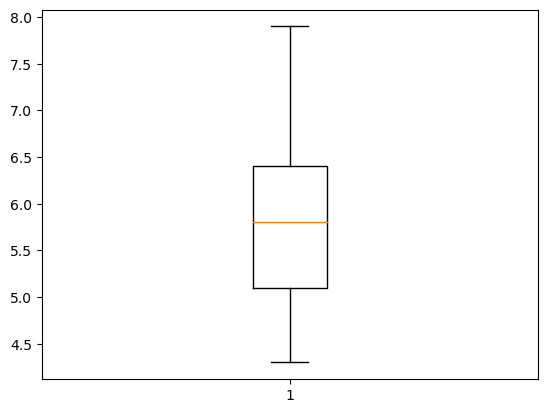

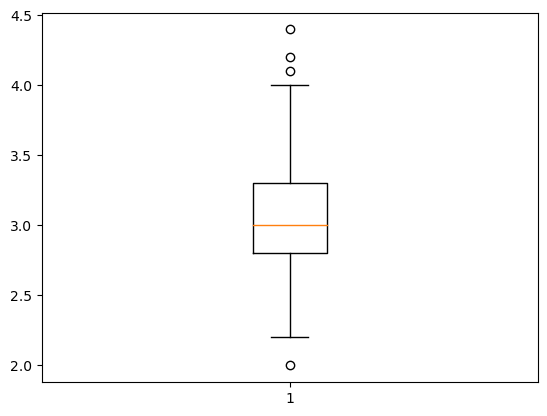

In [13]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([iris['Sepal.Length']])
plt.figure(2)
plt.boxplot([iris['Sepal.Width']])
plt.show()

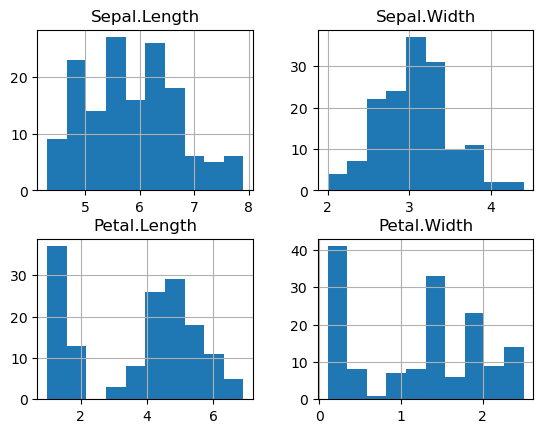

<Figure size 1000x700 with 0 Axes>

In [14]:

iris.hist()
plt.figure(figsize=(10,7))
plt.show()

# Spliting The Dataset:

In [15]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

In [16]:
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [17]:
X_train = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
y_train = train.Species

X_test = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
y_test = test.Species

In [18]:
X_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
141,6.9,3.1,5.1,2.3
117,7.7,3.8,6.7,2.2
16,5.4,3.9,1.3,0.4
128,6.4,2.8,5.6,2.1
140,6.7,3.1,5.6,2.4
...,...,...,...,...
49,5.0,3.3,1.4,0.2
53,5.5,2.3,4.0,1.3
112,6.8,3.0,5.5,2.1
83,6.0,2.7,5.1,1.6


In [19]:
y_train

141     virginica
117     virginica
16         setosa
128     virginica
140     virginica
          ...    
49         setosa
53     versicolor
112     virginica
83     versicolor
9          setosa
Name: Species, Length: 105, dtype: object

# Using ML model : 

**Using LogisticRegression :**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model1 = LogisticRegression()
model1.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

acc1 = accuracy_score(prediction1,y_test)

print(acc1)


0.9777777777777777


D:\Software\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Using Support Vector Machine :****

In [21]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train,y_train)

prediction2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score

acc2 = accuracy_score(prediction2,y_test)
print("Acc=",acc2)

Acc= 0.9555555555555556


**Using KNN Neighbors :**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train,y_train)
prediction3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score

acc3 = accuracy_score(prediction3, y_test)

print("Accuracy Score:",acc3 )

Accuracy Score: 0.9777777777777777


D:\Software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**Using Naive Bayes :**

In [23]:

from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train,y_train)
prediction4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score

acc4 = accuracy_score(prediction4, y_test)
print("Accuracy Score:",acc4  )

Accuracy Score: 0.9555555555555556


# Result of all the models :

In [24]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN','Naive Bayes'],
    'Score': [acc1,acc2,acc3,acc4]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
results.head(9)

,Model,Score
0,Logistic Regression,0.977778
1,Support Vector Machines,0.955556
2,KNN,0.977778
3,Naive Bayes,0.955556
